## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


## Sorted the dataset
Sorted the dataset according to the year and then the month. Made the YEAR_MONTH as the index of the dataset

In [3]:
data = pd.read_csv('air-traffic-prediction/AirtrafficA4.csv')
data['PASSENGERS CARRIED'] = pd.to_numeric(data['PASSENGERS CARRIED'].str.replace(',', ''))
data["YEAR_MONTH"] = pd.to_datetime(data['YEAR'].astype(str) + '-' + data['MONTH'].str[:3] + '-01', format='%Y-%b-%d')
data.set_index("YEAR_MONTH", inplace=True)
data = data.sort_values(by='YEAR_MONTH', kind='mergesort')
data

,AIRLINE,YEAR,MONTH,TOTAL DEPARTURES,HOURS FLOWN,KILOMETRE FLOWN,PASSENGERS CARRIED,AVAILABLE SEAT KILOMETRE (IN THOUSAND),FREIGHT CARRIED (IN TONNE),MAIL CARRIED (IN TONNE)
YEAR_MONTH,,,,,,,,,,
2013-01-01,A007,2013,JAN,"10,552","18,655","10,112",1408012.0,"18,20,105","6,465.00",0
2013-02-01,A007,2013,FEB,"9,873","17,374","9,439",1341210.0,"16,98,930","6,235.00",0
2013-03-01,A007,2013,MAR,"11,393","20,093","11,028",1423569.0,"19,84,886","6,505.00",0
2013-04-01,A007,2013,APR,"11,426","20,084","11,090",1511094.0,"19,96,084","5,903.00",0
2013-05-01,A007,2013,MAY,"11,885","20,779","11,533",1685168.0,"20,75,882","7,345.00",0
...,...,...,...,...,...,...,...,...,...,...
2023-04-01,A007,2023,APR,"48,752","84,232","42,615",7406440.0,"80,05,648","19,432.80","2,102.9"
2023-05-01,A007,2023,MAY,"50,956","87,917","44,505",8109626.0,"83,75,201","24,165.10","2,102.4"
2023-06-01,A007,2023,JUNE,"49,989","86,217","43,739",7893296.0,"82,54,272","23,522.60","2,383.0"


## Using Prophet to make the model

In [4]:
model = Prophet()
data['ds'] = data.index
data['y'] = data['PASSENGERS CARRIED']

model.fit(data)

22:48:33 - cmdstanpy - INFO - Chain [1] start processing
22:48:33 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = model.make_future_dataframe(periods=12, freq='MS')
future.tail(20)

,ds
120,2023-01-01
121,2023-02-01
122,2023-03-01
123,2023-04-01
124,2023-05-01
125,2023-06-01
126,2023-07-01
127,2023-08-01
128,2023-09-01
129,2023-10-01


In [6]:
forecast = model.predict(future)
forecast.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
128,2023-09-01,6.348012e+06,4.611586e+06,7.553395e+06,6.348012e+06,6.348012e+06,-276341.314923,-276341.314923,-276341.314923,-276341.314923,-276341.314923,-276341.314923,0.0,0.0,0.0,6.071671e+06
129,2023-10-01,6.386175e+06,4.955375e+06,8.055101e+06,6.386175e+06,6.386175e+06,52141.412854,52141.412854,52141.412854,52141.412854,52141.412854,52141.412854,0.0,0.0,0.0,6.438316e+06
130,2023-11-01,6.425609e+06,5.036012e+06,8.131836e+06,6.425609e+06,6.425609e+06,198843.534832,198843.534832,198843.534832,198843.534832,198843.534832,198843.534832,0.0,0.0,0.0,6.624453e+06
131,2023-12-01,6.463772e+06,5.392746e+06,8.347733e+06,6.463772e+06,6.463772e+06,464785.722766,464785.722766,464785.722766,464785.722766,464785.722766,464785.722766,0.0,0.0,0.0,6.928558e+06
132,2024-01-01,6.503207e+06,5.040745e+06,8.205902e+06,6.503206e+06,6.503207e+06,134467.706891,134467.706891,134467.706891,134467.706891,134467.706891,134467.706891,0.0,0.0,0.0,6.637674e+06
133,2024-02-01,6.542641e+06,5.042165e+06,8.074082e+06,6.542641e+06,6.542641e+06,6444.343632,6444.343632,6444.343632,6444.343632,6444.343632,6444.343632,0.0,0.0,0.0,6.549086e+06
134,2024-03-01,6.579532e+06,5.022094e+06,8.257984e+06,6.579532e+06,6.579532e+06,129134.968017,129134.968017,129134.968017,129134.968017,129134.968017,129134.968017,0.0,0.0,0.0,6.708667e+06
135,2024-04-01,6.618966e+06,5.357013e+06,8.379598e+06,6.618966e+06,6.618967e+06,195366.973521,195366.973521,195366.973521,195366.973521,195366.973521,195366.973521,0.0,0.0,0.0,6.814333e+06
136,2024-05-01,6.657129e+06,4.798317e+06,7.912164e+06,6.657129e+06,6.657129e+06,-219036.975782,-219036.975782,-219036.975782,-219036.975782,-219036.975782,-219036.975782,0.0,0.0,0.0,6.438092e+06
137,2024-06-01,6.696564e+06,4.806492e+06,8.058748e+06,6.696563e+06,6.696564e+06,-306870.797759,-306870.797759,-306870.797759,-306870.797759,-306870.797759,-306870.797759,0.0,0.0,0.0,6.389693e+06


In [7]:
print('The predicted values by this model are: ')
forecast[['ds', 'yhat']].tail(12)

The predicted values by this model are: 


,ds,yhat
128,2023-09-01,6.071671e+06
129,2023-10-01,6.438316e+06
130,2023-11-01,6.624453e+06
131,2023-12-01,6.928558e+06
132,2024-01-01,6.637674e+06
133,2024-02-01,6.549086e+06
134,2024-03-01,6.708667e+06
135,2024-04-01,6.814333e+06
136,2024-05-01,6.438092e+06
137,2024-06-01,6.389693e+06


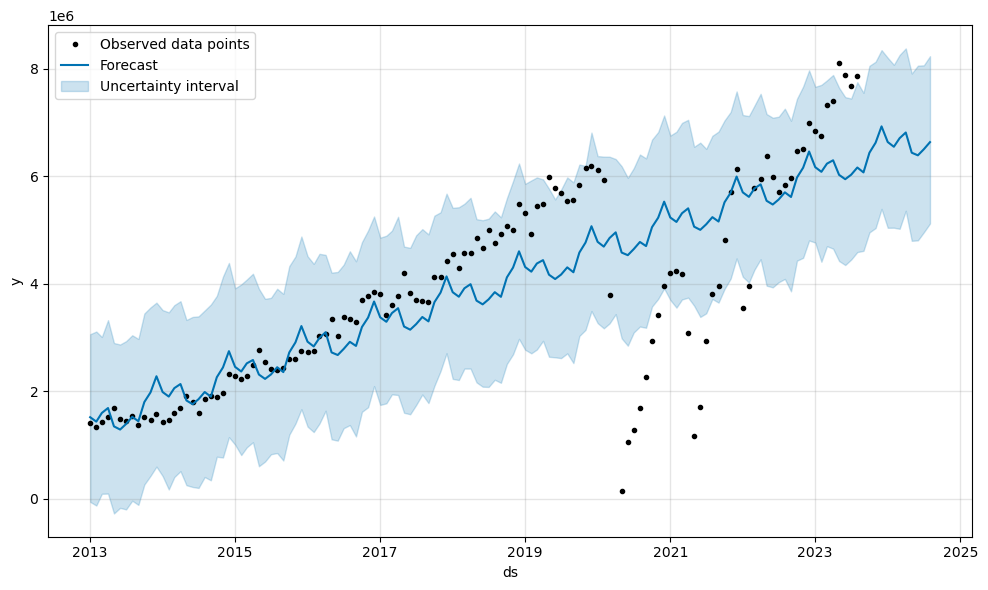

In [8]:
fig = model.plot(forecast, include_legend=True)

This model fits a time series on the whole time series instead of just predicting the next values